## **Baseline Machine Learning model prepared for Pos-Doctoral interview**

#### *description*

### 0. Imports

In [1]:
import pandas as pd
import json

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
import matplotlib.pyplot as plt

from utils.preprocess import Preprocess
from utils.compare import Compare
from utils.visualization import Visualization

### 1. Preprocessing

In [2]:
#display(Image(filename='img/data_processing.png'))

In [2]:
data = pd.read_csv('task_files/dataset.csv', sep=',')
split_data = pd.DataFrame([json.loads(f) for f in data["fingerprint"].tolist()]).add_prefix('fingerprint_')
full_data = pd.concat([data, split_data], axis=1)

1.1 Dependent variables

In [3]:
data_x = full_data.iloc[:,3:]
data_x

,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,fingerprint_7,fingerprint_8,fingerprint_9,...,fingerprint_1014,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


1.2 Independent variables

In [4]:
data_y = full_data.iloc[:,2]
data_y

0         45.350445
1         15.089815
2         36.877441
3         71.586034
4       1606.960845
           ...     
8995       5.645168
8996      50.430694
8997     296.931063
8998       6.657873
8999     473.664848
Name: target, Length: 9000, dtype: float64

In [5]:
process = Preprocess(data_x)

1.3 Remove NaN values

In [6]:
data_x = process.rm_NaN()

Before removing NaN values: (9000, 1024)

NaN values not found.
After removing NaN values: (9000, 1024)


1.4 Remove Empty Features

In [7]:
data_x = process.rm_EmptyFeature()

Before removing Empty Feature: (9000, 1024)

Empty Feature values not found.
After removing Empty Feature: (9000, 1024)


1.5 Remove High Colinearity values

In [8]:
data_x = process.rm_HighCol(thresh=0.7)

Before removing High Colinearity values: (9000, 1024)

After removing High Colinearity values: (9000, 1015)


1.6 Perform Data Scaling

In [9]:
data_x = process.do_DataScaling(scaler='normalization')

1.7 Check for Low Variance Features

In [11]:
data_x = process.get_LowVarianceColumns(thresh=0.2, autoremove=True)

Finding low-variance features.
Found 1004 low-variance columns.
Removing low-variance features.
Reassembling the self.dataframe (with low-variance features removed).
Succesfully removed low-variance columns.


1.8 Display correlation

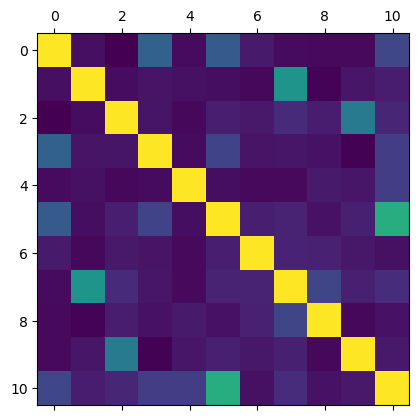

In [13]:
plt.matshow(data_x.corr(method = 'pearson').abs())
plt.show()

1.9 Visualizing data

In [11]:
vis = Visualization()

NameError: name 'Visualization' is not defined

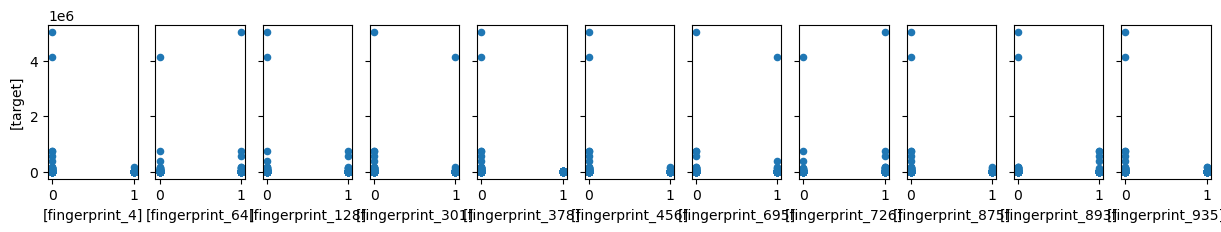

In [15]:
vis.features_plot(data_x, data_y, 'target')

In [25]:
full_data_y = full_data[['smiles', 'target']]
vis.plot(full_data_y)

Encoding molecule 0: Cc1ccc(C2(CN3CCC(NC(=O)c4cc[nH]n4)CC3)CCCCC2)cc1
Encoding molecule 1: Cc1c(C(C)C)c(=O)on1C(=O)N1C(C)CCC1C
Encoding molecule 2: COc1cc(OC)cc(-c2cn(-c3ccc(O)c(C(=O)Nc4cccc(C(=O)O)c4)c3)nn2)c1
Encoding molecule 3: C=C(C)C1C2C(C)CCC2C2(C)CCC12
Encoding molecule 4: C=CC(C)(C=Cc1ccc(Nc2ccccc2)cc1)CCC=C(C)C
Encoding molecule 5: CCc1noc(C(C)N2CCC(NC(=O)c3ccc(C)s3)CC2)n1
Encoding molecule 6: CC(C)=CCCC(C)=CCCC(C)=CCSCC(NC(=O)CCCCCN1CCCC1)C(=O)N1CCCCC1
Encoding molecule 7: COC1(c2ccccn2)CCCN(c2nnc(N3CCC(N4CCCCC4)CC3)s2)C1
Encoding molecule 8: COc1ccc(NC(=O)NNC(=O)CCc2ccccc2OC)cc1
Encoding molecule 9: C#CCn1cnc2c(N)nc(C#CC3(O)CCCCC3)nc21
Encoding molecule 10: COc1cccc2c1CCCC2Nc1cc(-c2ccc3ncsc3c2)nc(C)n1
Encoding molecule 11: CSCC(=O)N1CCOC(c2nc(C(C)(C)C)n[nH]2)C1
Encoding molecule 12: Nc1cc(C(=O)OCC(=O)N2CCCC2=O)ccc1Cl
Encoding molecule 13: CN(C)c1nc2c(N)ncnc2n1C1OC(CO)C(O)C1O
Encoding molecule 14: N#CC1CCN(C(=O)N2CC(NC(=O)C3CCCC3)CC(c3ccc(C(F)(F)F)cc3)C2)CC1
Encoding molecul

c:\Users\brend\OneDrive - IQ-UFRJ\zurich_task\utils\visualization.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dash is running on http://127.0.0.1:8050/



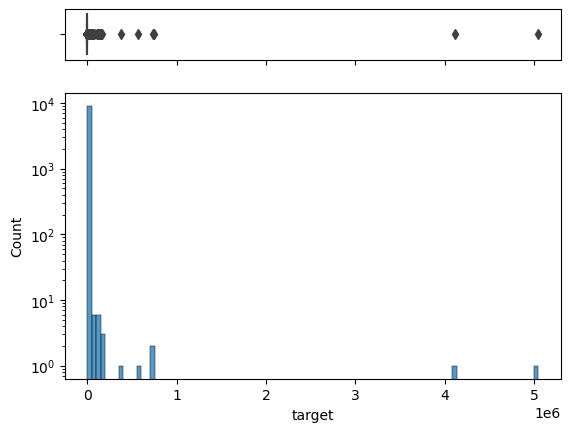

In [17]:
vis.create_BoxHist(data_y)

1.9 Outlier detection an treatment

In [5]:
process = Preprocess(full_data)
data_noOutlier = process.outlier_treatment()
data_x_NoOut = data_noOutlier.iloc[:,3:-1]
data_y_NoOut = data_noOutlier.iloc[:,-1]

477.1060860488395
-345.0775302423352
89.5% quantile:    448.82901734369085
90% quantile:    479.26420050478976
92.5% quantile:  695.169908221103
95% quantile:    1092.7361019040472
97.5% quantile:  2833.3953294732582
99% quantile:    7671.623095886942
99.9% quantile:  137717.46359598194


1.10 Dimensionality reduction

In [6]:
process = Preprocess(data_x)
data_noOutlier = process.do_DimensionalityReduction(features=500)
data_x_red = data_noOutlier.iloc[:,3:-1]

### 2. Choosing model

In [1]:
import pandas as pd
import json 

from utils.preprocess import Preprocess
from utils.compare import Compare
from utils.visualization import Visualization
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

In [2]:
data = pd.read_csv('task_files/dataset.csv', sep=',')
split_data = pd.DataFrame([json.loads(f) for f in data["fingerprint"].tolist()]).add_prefix('fingerprint_')
full_data = pd.concat([data, split_data], axis=1)

In [3]:
data_x = full_data.iloc[:,3:]
data_x

,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,fingerprint_7,fingerprint_8,fingerprint_9,...,fingerprint_1014,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
data_y = full_data.iloc[:,2]
data_y

0        45.35
1        15.09
2        36.88
3        71.59
4      1606.96
         ...  
8995      5.65
8996     50.43
8997    296.93
8998      6.66
8999    473.66
Name: target, Length: 9000, dtype: float64

In [5]:
print ('The shape of x_train is:', data_x.shape)
print ('The shape of y_train is: ', data_y.shape)
print ('Number of training examples (m):', len(data_x))

The shape of x_train is: (9000, 1024)
The shape of y_train is:  (9000,)
Number of training examples (m): 9000


In [20]:
compare = Compare()

In [52]:
models = [linear_model.LinearRegression(),  linear_model.SGDRegressor(), linear_model.Ridge(), 
          linear_model.Lasso(), linear_model.ElasticNet(), linear_model.BayesianRidge()]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut], 
            'Feature reduction':[data_x_red, data_y],
            'Outlier and feature reduction':[data_x_red, data_y_NoOut],
            'Outlier and log transform':[data_x, np.log(data_y_NoOut)]}

comparison_results_df = compare.compare_models(models, datasets)

Metrics for Original using LinearRegression() -> Cross Validation score: -7.55 (+/- 24.77),                      Jtrain: 4364903761.49, Jtest: 5468981162.72
Metrics for Original using SGDRegressor() -> Cross Validation score: -5.91 (+/- 19.10),                      Jtrain: 4377691912.86, Jtest: 5360083270.42
Metrics for Original using Ridge() -> Cross Validation score: -7.38 (+/- 24.23),                      Jtrain: 4364977785.14, Jtest: 5455379019.57
Metrics for Original using Lasso() -> Cross Validation score: -7.42 (+/- 24.33),                      Jtrain: 4365002373.09, Jtest: 5457327372.91
Metrics for Original using ElasticNet() -> Cross Validation score: -0.09 (+/- 0.35),                      Jtrain: 4822986351.82, Jtest: 4895594861.77
Metrics for Original using BayesianRidge() -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834349.27, Jtest: 4894634269.11
Metrics for Outlier treatment using LinearRegression() -> Cross Validation score: 0.51 (+/- 0.0

In [14]:
comparison_results_dfa = comparison_results_df.rename(columns={'Outlier and feature redution':'Outlier and feature reduction', 'Feature redution':'Feature reduction'})

In [46]:
vis = Visualization()

In [54]:
vis.create_ComparePlot(comparison_results_df)

In [38]:
models = {"BayesianRidge": linear_model.BayesianRidge()}
param_grid = {"BayesianRidge": {"alpha_1": list(10000.0 ** np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2], dtype=int)),
                    "lambda_1": list(10000.0 ** np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2], dtype=int))}}
best_estimator, best_score = compare.hyperparameter_search(data_x, np.log(data_y_NoOut), models, param_grid)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 1/81] START alpha_1=1e-24, lambda_1=1e-24..............................
[CV 1/3; 1/81] END alpha_1=1e-24, lambda_1=1e-24; neg_mean_squared_error: (train=-0.778, test=-1.086) r2: (train=0.821, test=0.754) total time=   1.9s
[CV 2/3; 1/81] START alpha_1=1e-24, lambda_1=1e-24..............................
[CV 2/3; 1/81] END alpha_1=1e-24, lambda_1=1e-24; neg_mean_squared_error: (train=-0.788, test=-1.053) r2: (train=0.817, test=0.765) total time=   1.9s
[CV 3/3; 1/81] START alpha_1=1e-24, lambda_1=1e-24..............................
[CV 3/3; 1/81] END alpha_1=1e-24, lambda_1=1e-24; neg_mean_squared_error: (train=-0.806, test=-1.019) r2: (train=0.819, test=0.757) total time=   1.8s
[CV 1/3; 2/81] START alpha_1=1e-24, lambda_1=1e-20..............................
[CV 1/3; 2/81] END alpha_1=1e-24, lambda_1=1e-20; neg_mean_squared_error: (train=-0.778, test=-1.086) r2: (train=0.821, test=0.754) total time=   1.8s
[CV 2/3; 2

In [39]:
best_estimator, best_score

([BayesianRidge(alpha_1=1e-24, lambda_1=1.0)], [0.7588463454808553])

In [40]:
list(1000.0 ** np.array([-6, -5, -4, -3, -2, -1, 0, 1, 2], dtype=int))

[1e-18, 1e-15, 1e-12, 1e-09, 1e-06, 0.001, 1.0, 1000.0, 1000000.0]

In [45]:
models = [linear_model.BayesianRidge(lambda_1=1e-18), linear_model.BayesianRidge(lambda_1=1e-12), 
            linear_model.BayesianRidge(lambda_1=1e-06), linear_model.BayesianRidge(lambda_1=1.0),
            linear_model.BayesianRidge(lambda_1=1000000.0)]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut], 
            'Feature reduction':[data_x_red, data_y],
            'Outlier and feature reduction':[data_x_red, data_y_NoOut],
            'Outlier and log transform':[data_x, np.log(data_y_NoOut)]}

comparison_results_df_hyp = compare.compare_models(models, datasets)

Metrics for Original using BayesianRidge(lambda_1=1e-18) -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834327.31, Jtest: 4894634267.04
Metrics for Original using BayesianRidge(lambda_1=1e-12) -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834327.31, Jtest: 4894634267.04
Metrics for Original using BayesianRidge() -> Cross Validation score: -0.03 (+/- 0.14),                      Jtrain: 4860834349.27, Jtest: 4894634269.11
Metrics for Original using BayesianRidge(lambda_1=1.0) -> Cross Validation score: -0.03 (+/- 0.09),                      Jtrain: 4900489942.06, Jtest: 4901334512.27
Metrics for Original using BayesianRidge(lambda_1=1000000.0) -> Cross Validation score: -0.03 (+/- 0.09),                      Jtrain: 4900489942.06, Jtest: 4901334512.27
Metrics for Outlier treatment using BayesianRidge(lambda_1=1e-18) -> Cross Validation score: 0.55 (+/- 0.03),                      Jtrain: 7838.22, Jtest: 9634.43
Metrics for Ou

In [47]:
vis.create_ComparePlot(comparison_results_df_hyp)

In [33]:
models = [tree.DecisionTreeRegressor(), ensemble.ExtraTreesRegressor(), ensemble.RandomForestRegressor(),
          ensemble.GradientBoostingRegressor(), ensemble.HistGradientBoostingRegressor()]
datasets = {'Original':[data_x, data_y], 'Outlier treatment':[data_x, data_y_NoOut], 
            'Feature reduction':[data_x_red, data_y],
            'Outlier and feature reduction':[data_x_red, data_y_NoOut],
            'Outlier and log transform':[data_x, np.log(data_y_NoOut)]}

comparison_results_df_tree = compare.compare_models(models, datasets)

Metrics for Original using DecisionTreeRegressor() -> R2: -5.28 (+/- 15.21),                      Jtrain: 995050828.88, Jtest: 11548763121.10
Metrics for Original using ExtraTreesRegressor() -> R2: -8.52 (+/- 29.17),                      Jtrain: 995050828.88, Jtest: 9334509805.54


KeyboardInterrupt: 

### 3. Training model

In [51]:
from utils.model import Model

model = Model()
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model.build_model(data_x, np.log(data_y_NoOut), linear_model.BayesianRidge(alpha_1=1e-24, lambda_1=1.0), cross_val=kf)

R2: 0.76 (+/- 0.02)
 MAE: 0.78 
 MSE: 1.03


visualization of prediction pls

### 4. Prediction

In [7]:
pred_data = pd.read_csv('task_files/test.csv', sep=',')
split_pred_data = pd.DataFrame([json.loads(f) for f in pred_data["fingerprint"].tolist()]).add_prefix('fingerprint_')

In [8]:
from utils.predict import Predict

predict = Predict()
kf = KFold(n_splits=5, random_state=42, shuffle=True)
pred, test_pred, test_actual = predict.model_prediction(data_x, np.log(data_y_NoOut), 
                                                        linear_model.BayesianRidge(alpha_1=1e-24, lambda_1=1.0), 
                                                        cross_val=kf, predict_data=split_pred_data)

For this iteration -> Cross Validation score: <function r2_score at 0x000002B92F854220>
For this iteration -> Cross Validation score: <function r2_score at 0x000002B92F854220>
For this iteration -> Cross Validation score: <function r2_score at 0x000002B92F854220>
For this iteration -> Cross Validation score: <function r2_score at 0x000002B92F854220>
For this iteration -> Cross Validation score: <function r2_score at 0x000002B92F854220>


In [9]:
np.exp(pred)

array([2.79996740e+02, 1.38160407e+02, 5.56371644e+00, 1.06722270e-01,
       3.65271003e-01, 5.02228237e+00, 3.82222059e+01, 8.42619812e+01,
       1.57363418e+01, 6.50473465e+00, 6.93828702e+01, 1.82983751e+02,
       2.75116690e+01, 4.89320469e+00, 1.14482869e+02, 5.91080333e+02,
       2.68535280e+00, 2.66860296e+01, 5.78722801e+00, 4.25402943e+02,
       1.80625786e+01, 1.32847271e+00, 7.40082054e+01, 6.83576302e+01,
       5.86798545e+01, 3.00383149e+01, 3.92382934e+01, 2.33720872e+01,
       2.85333683e+01, 3.53329233e+00, 6.95683760e+01, 1.15849968e+02,
       4.29162887e+02, 1.82044633e+01, 5.90684636e+01, 1.38425399e+01,
       1.37430540e+00, 2.38921029e+01, 9.04176903e+01, 5.99652778e+00,
       5.96013875e+00, 7.50178076e+00, 9.30699734e+00, 1.92355502e+01,
       4.16615932e+01, 1.64545901e+01, 6.47095542e+01, 3.45110532e+01,
       2.98040643e+02, 3.54455376e+00, 2.91084865e+00, 6.81310365e+01,
       4.20791901e+01, 4.39128101e+01, 2.97785886e-01, 1.61409421e+01,
      

In [12]:
pred_df = pd.DataFrame([np.exp(test_pred), np.exp(test_actual)])
pred_df.T
#coluna com erro absoluto

,0,1
0,20.32,45.35
1,157.85,71.59
2,62.31,12.05
3,53.93,92.32
4,286.41,209.61
...,...,...
1795,231.74,126.27
1796,88.83,105.93
1797,58.81,47.82
1798,8.89,6.66


----------------